<a href="https://colab.research.google.com/github/HugoKD/ML/blob/main/R%C3%A9cap_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

###DATA

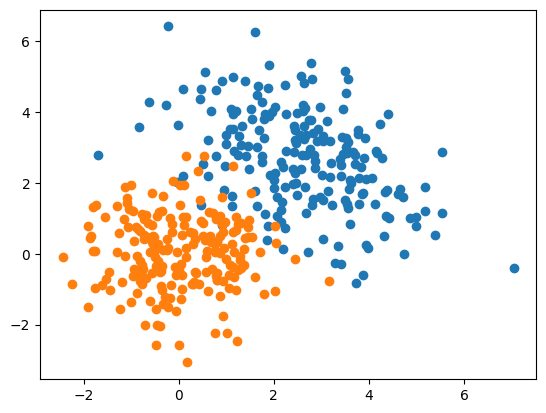

In [35]:
N = 200

X_1 = np.random.multivariate_normal([2.5, 2.5], [[2, -0.8], [-0.8, 2]], N)
y_1 = np.ones(N)

X_2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], N)
y_2 = np.zeros(N)

plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.show()

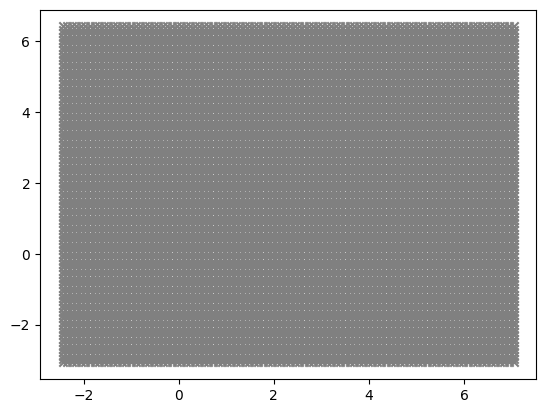

In [36]:
X = np.vstack((X_1, X_2))
y = np.hstack((y_1, y_2))

X_horiz_max, X_horiz_min = np.max(X[:, 0]), np.min(X[:, 0])
X_vertic_max, X_vertic_min = np.max(X[:, 1]), np.min(X[:, 1])

points_horiz = np.linspace(start=X_horiz_min,
                      stop=X_horiz_max,
                     num=100)

point_vertic = np.linspace(start=X_vertic_min,
                      stop=X_vertic_max,
                     num=100)

x1Eval, x2Eval = np.meshgrid(points_horiz, point_vertic)
plt.scatter(x1Eval, x2Eval, marker='x', c='grey')

##Part1

###Decision tree

In [37]:
# Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
tree = DecisionTreeClassifier()

tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)

In [39]:
from sklearn.tree import export_text

text_tree = export_text(tree,
                        feature_names=np.array(["X1", "X2"]))
print(text_tree)

|--- X1 <= 1.50
|   |--- X2 <= 1.98
|   |   |--- X2 <= 1.35
|   |   |   |--- X1 <= 0.60
|   |   |   |   |--- class: 0.0
|   |   |   |--- X1 >  0.60
|   |   |   |   |--- X1 <= 0.61
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- X1 >  0.61
|   |   |   |   |   |--- class: 0.0
|   |   |--- X2 >  1.35
|   |   |   |--- X1 <= 0.45
|   |   |   |   |--- class: 0.0
|   |   |   |--- X1 >  0.45
|   |   |   |   |--- X2 <= 1.49
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- X2 >  1.49
|   |   |   |   |   |--- X1 <= 0.93
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- X1 >  0.93
|   |   |   |   |   |   |--- class: 1.0
|   |--- X2 >  1.98
|   |   |--- X2 <= 2.76
|   |   |   |--- X2 <= 2.65
|   |   |   |   |--- class: 1.0
|   |   |   |--- X2 >  2.65
|   |   |   |   |--- class: 0.0
|   |   |--- X2 >  2.76
|   |   |   |--- class: 1.0
|--- X1 >  1.50
|   |--- X2 <= -0.63
|   |   |--- X1 <= 2.87
|   |   |   |--- class: 0.0
|   |   |--- X1 >  2.87
|   |   |   |--- class:

###Décision boundary

In [40]:
'''a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.c_[a, b])
# Résultat : [[1 4]
#             [2 5]
#             [3 6]]
'''

'a = np.array([1, 2, 3])\nb = np.array([4, 5, 6])\nprint(np.c_[a, b])  \n# Résultat : [[1 4]\n#             [2 5]\n#             [3 6]]\n'

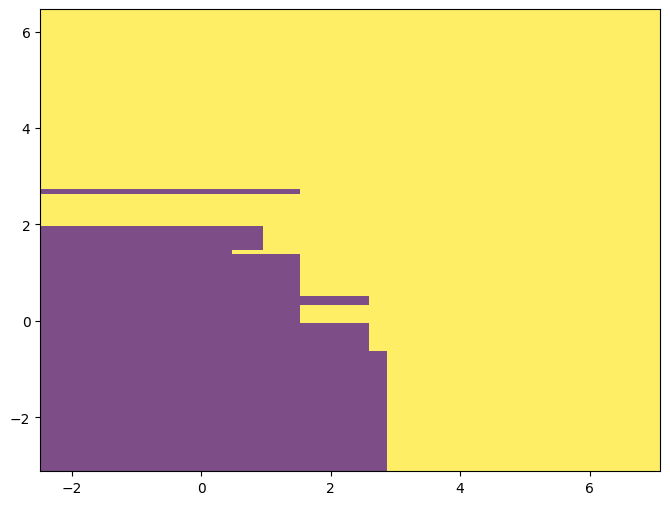

In [41]:
y_boundaries = tree.predict(np.c_[x1Eval.ravel(), x2Eval.ravel()])
y_boundaries = y_boundaries.reshape(x1Eval.shape)

plt.figure(figsize=(8, 6))

# Utiliser pcolormesh pour afficher la couleur
plt.pcolormesh(x1Eval, x2Eval, y_boundaries, cmap='viridis', alpha=0.7)
# Afficher le graphique
plt.show()

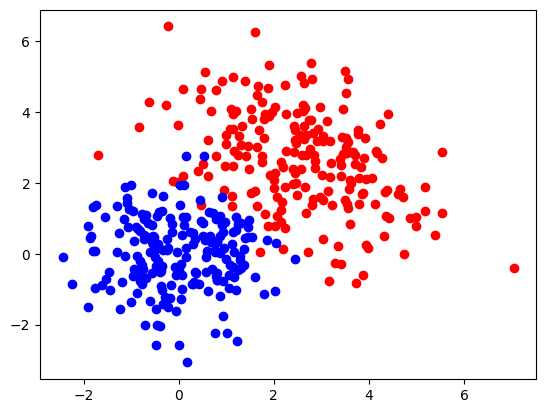

In [42]:
y_pred_tot = tree.predict(X)
plt.scatter(X[y_pred_tot==1,0],X[y_pred_tot==1,1],color='red')
plt.scatter(X[y_pred_tot==0,0],X[y_pred_tot==0,1],color='blue')
plt.show()

####TEST

(10, 10)


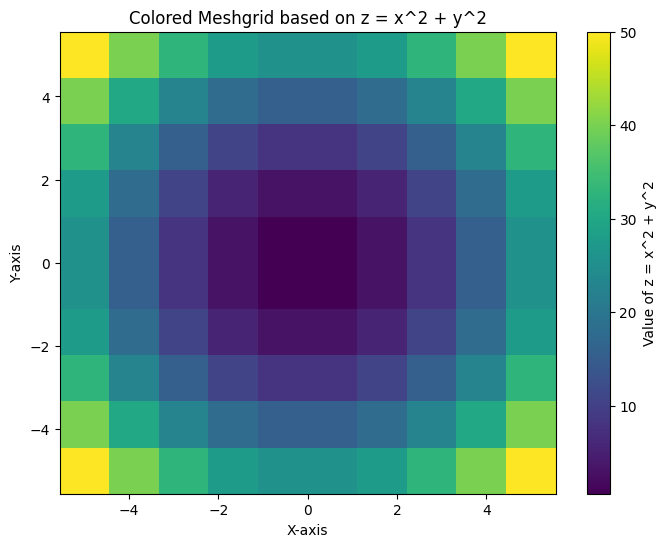

In [43]:
# Définir les points de la grille
x_points = np.linspace(-5, 5, 10)  # 100 points entre -5 et 5
y_points = np.linspace(-5, 5, 10)

# Créer le meshgrid
x_grid, y_grid = np.meshgrid(x_points, y_points)
# Calculer les valeurs à colorer
z_values = x_grid**2 + y_grid**2  # Exemple de fonction
print(z_values.shape)
# Créer le graphique
plt.figure(figsize=(8, 6))

# Utiliser pcolormesh pour afficher la couleur
plt.pcolormesh(x_grid, y_grid, z_values, shading='auto', cmap='viridis')

# Ajouter une barre de couleur
plt.colorbar(label='Value of z = x^2 + y^2')

# Ajouter des labels et un titre
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Colored Meshgrid based on z = x^2 + y^2')

# Afficher le graphique
plt.show()


Meshgrid -> renvoie un tuple -> (y_coordonnées,x_coordonnées) ou chacun est un vecteur dupliqué le nombre de pooint de la grid

###Meta parameters: split, leaf and deviance

In [44]:
print(tree.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


Les arguments de la fonction d'abre de décision DecisionTreeClassifier sont :

    "criterion" : la fonction utilisée pour mesurer la pureté (par défaut la fonciton de Gini)
    "splitter" : désigne la manière de sélectionner le split (la valeur du seuil + la variable) soit la meilleures valeur (par défaut) ou bien de manière aléatoire
    "max_depth" : la profondeur maximale de l'arbre (None par défaut) si aucune, l'arbre se construit jusqu'à ce que chaque feuille soit pure ou bien que qu'il n'y ait pas assez de données pour faire un noeud (<min_samples_split)
    "min_samples_split" : si l'on traite des nombres entiers, nb données minimal pour faire un noeud (2 par défaut). En revanche si l'on traite des flottants, cette valeur sera égale à ceil(min_samples_split * nombre_de_donnees_en_entree_de_larbre)
    "min_samples_leaf" : si l'on traite des entiers c'est le nombre minimum dans chaque feuille créée qu'il doit y avoir (1 par défaut). Si float faire ceil(min_samples_leaf * n_samples).
    "min_weight_fraction_leaf" : définit la fraction minimale du poids total des échantillons (ou du nombre d'échantillons si aucun poids n'est spécifié) qui doit être présente dans chaque feuille
    "max_features" : le nombre de variables à considérer pour rechercher le meilleur split
  

##PART2

In [45]:
from sklearn import tree as Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier


treemod = Tree.DecisionTreeClassifier()
bagmod=BaggingClassifier(estimator=treemod, n_estimators=10, random_state=0)
treemodfit=treemod.fit(X, y);
bagmodfit=bagmod.fit(X, y);
pY_train=bagmodfit.predict_proba(X);

predxclass=np.argmax(pY_train,axis=1); #print(predclass)

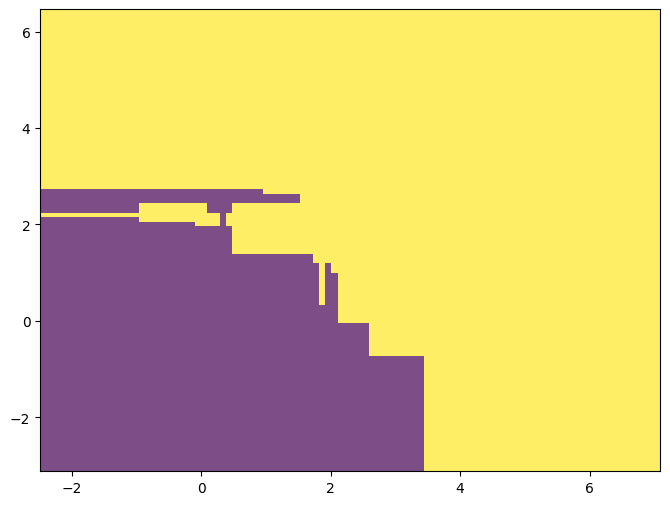

In [46]:
y_boundaries = bagmodfit.predict(np.c_[x1Eval.ravel(), x2Eval.ravel()])
y_boundaries = y_boundaries.reshape(x1Eval.shape)

plt.figure(figsize=(8, 6))

# Utiliser pcolormesh pour afficher la couleur
plt.pcolormesh(x1Eval, x2Eval, y_boundaries, cmap='viridis', alpha=0.7)
# Afficher le graphique
plt.show()

In [47]:
y_pred_tot = bagmodfit.predict(X)

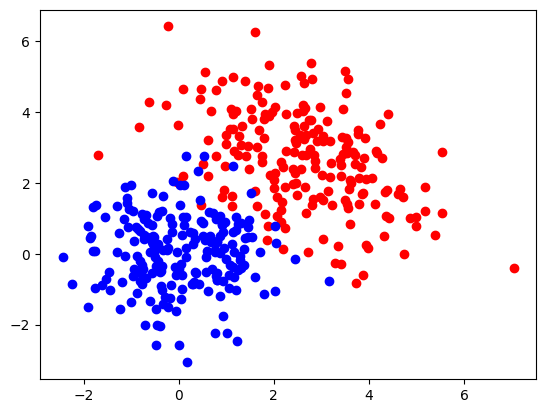

In [48]:
plt.scatter(X[y_pred_tot==1,0],X[y_pred_tot==1,1],color='red')
plt.scatter(X[y_pred_tot==0,0],X[y_pred_tot==0,1],color='blue')
plt.show()

###Random Forest

In [50]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

RF = RandomForestClassifier(max_depth=2, random_state=0, oob_score = True)
RFfit = RF.fit(X, y);

In [51]:
score=RF.score;
OOB=RF.oob_score_
IF=RF.feature_importances_

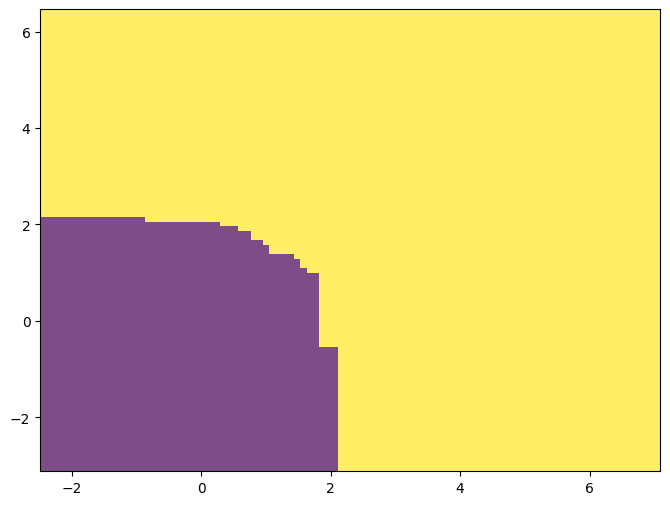

In [52]:
y_boundaries = RF.predict(np.c_[x1Eval.ravel(), x2Eval.ravel()])
y_boundaries = y_boundaries.reshape(x1Eval.shape)

plt.figure(figsize=(8, 6))

# Utiliser pcolormesh pour afficher la couleur
plt.pcolormesh(x1Eval, x2Eval, y_boundaries, cmap='viridis', alpha=0.7)
# Afficher le graphique
plt.show()

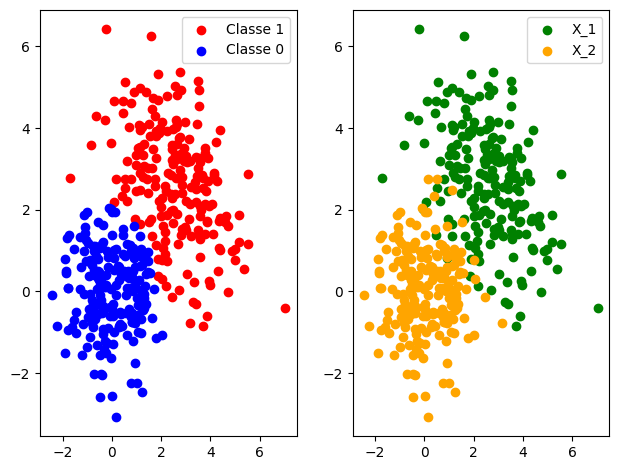

In [60]:
plt.subplot(1, 2, 1)
plt.scatter(X[y_pred_tot==1, 0], X[y_pred_tot==1, 1], color='red', label='Classe 1')
plt.scatter(X[y_pred_tot==0, 0], X[y_pred_tot==0, 1], color='blue', label='Classe 0')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_1[:, 0], X_1[:, 1], color='green', label='X_1')
plt.scatter(X_2[:, 0], X_2[:, 1], color='orange', label='X_2')
plt.legend()

plt.tight_layout()
plt.show()